# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('Wholesale_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
data_count = data['Channel'].value_counts()
print(data_count)

Channel
1    298
2    142
Name: count, dtype: int64


In [22]:
data_count1 = data['Region'].value_counts()
print(data_count1)

Region
3    316
1     77
2     47
Name: count, dtype: int64


In [24]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [31]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

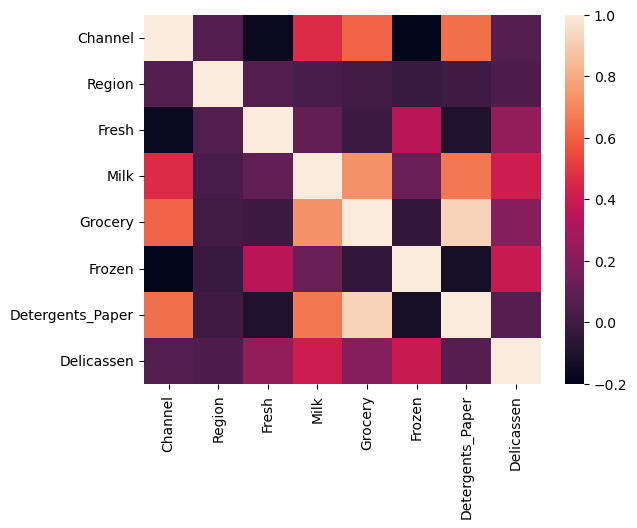

In [63]:
sns.heatmap(data.corr())

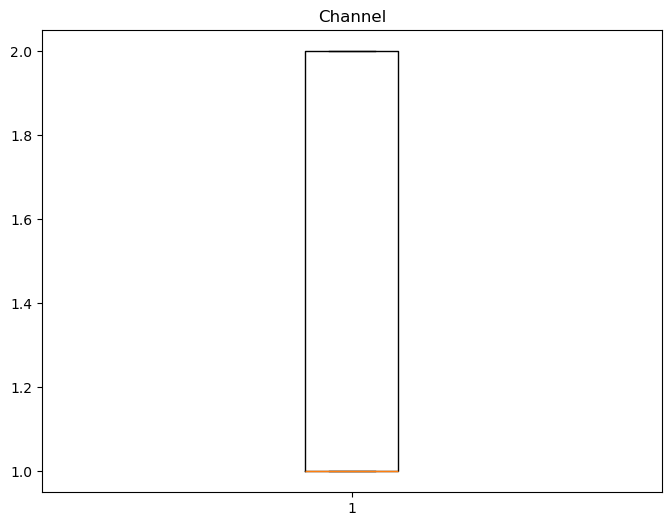

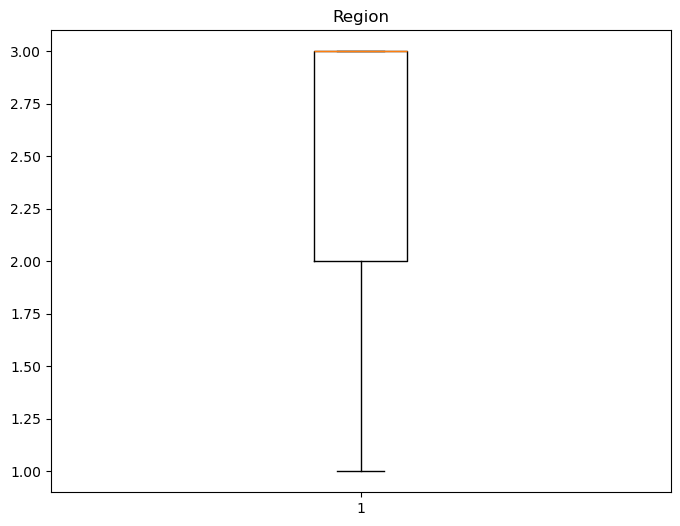

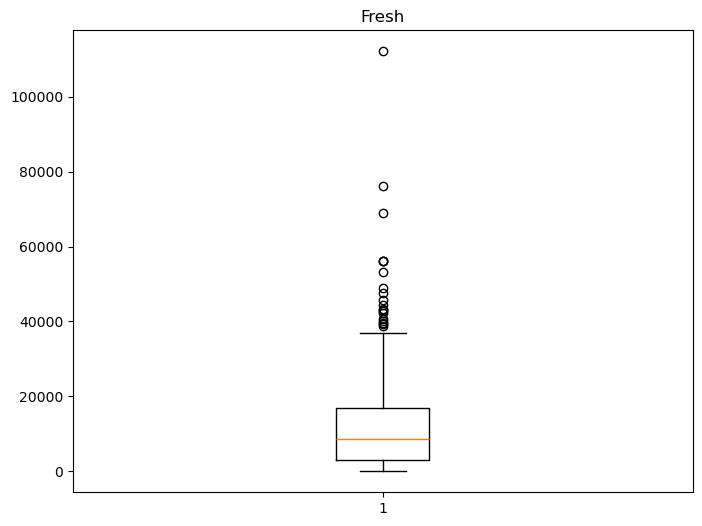

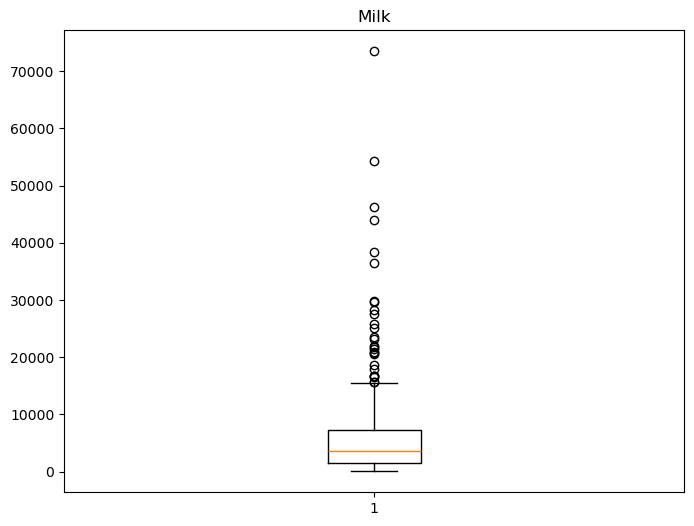

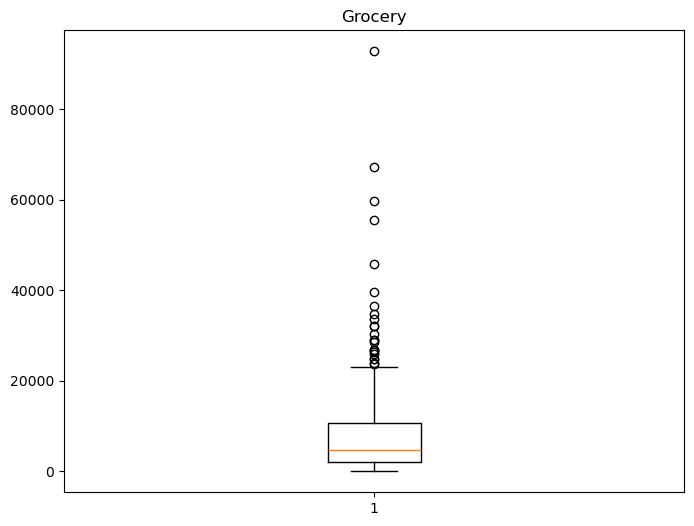

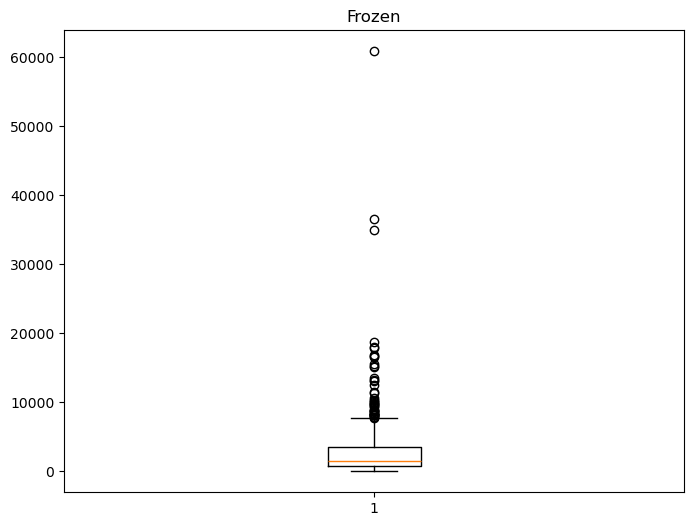

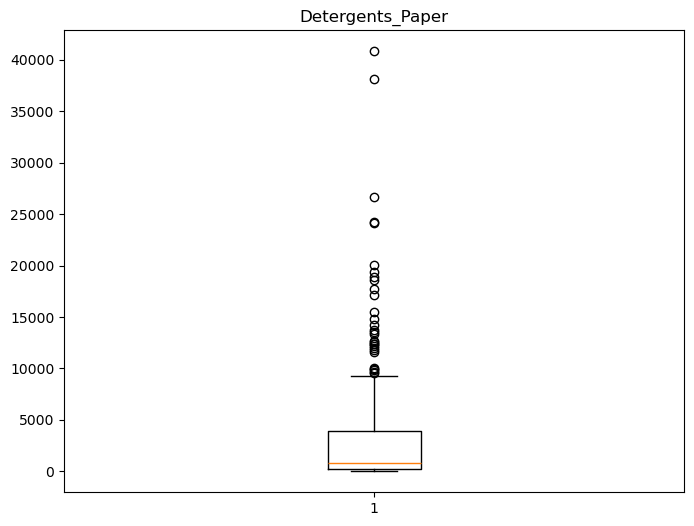

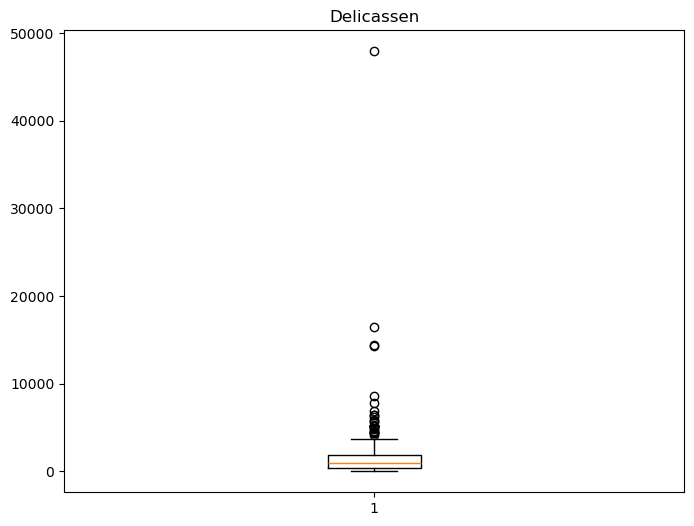

In [29]:
#Creating boxplots for all column variables
def generate_box_plots(data):
    for column in data.columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(data[column])
        plt.title(f'{column}')
        plt.show()

generate_box_plots(data)

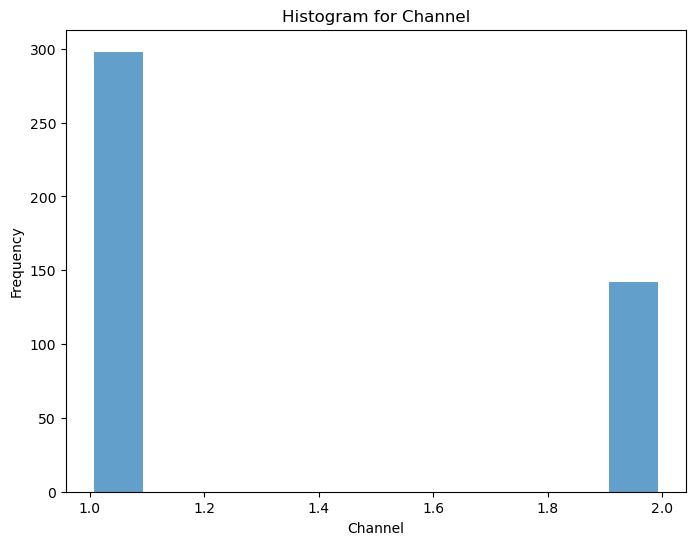

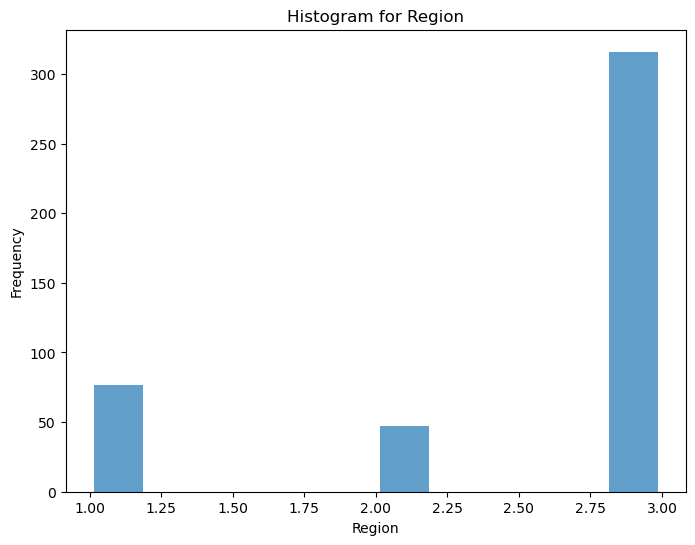

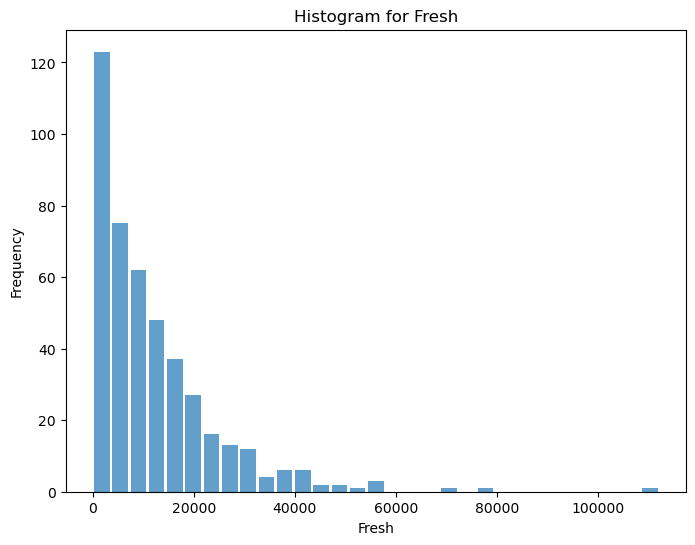

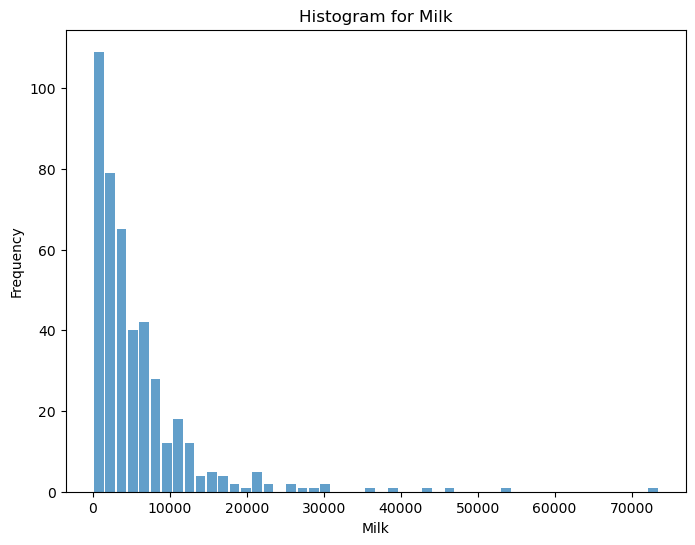

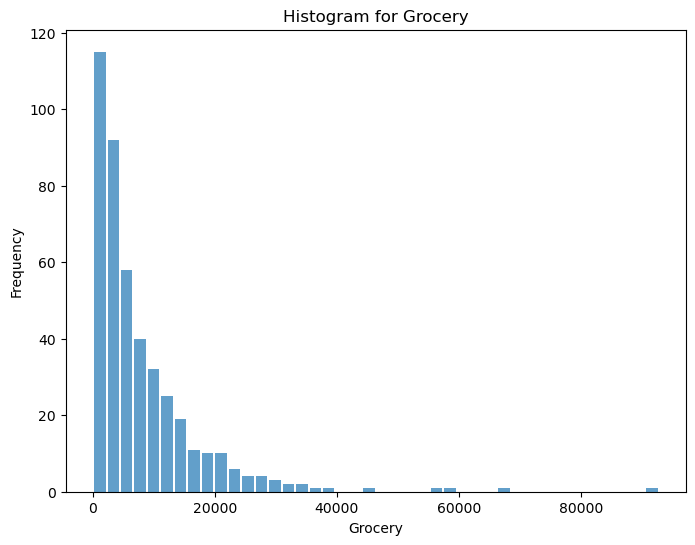

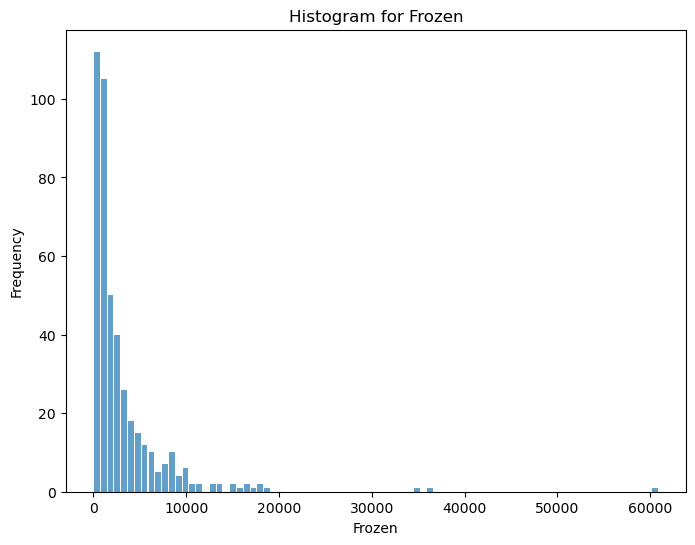

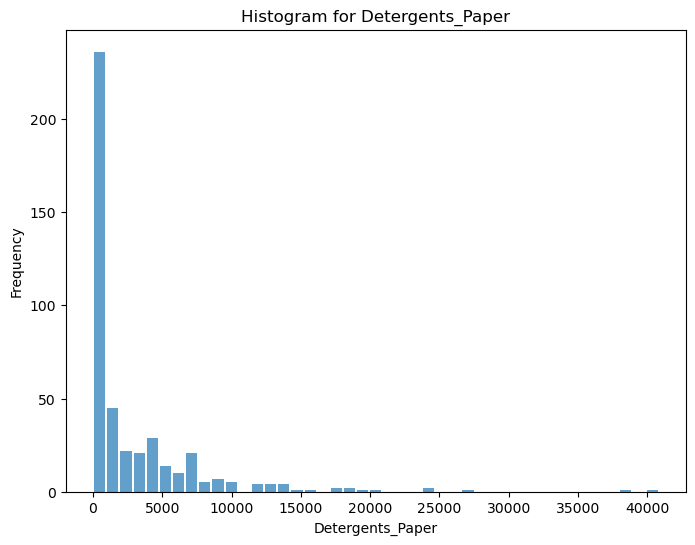

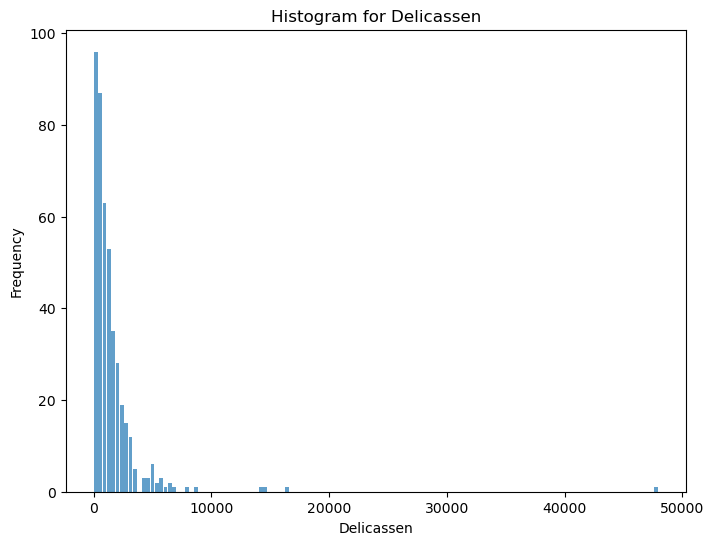

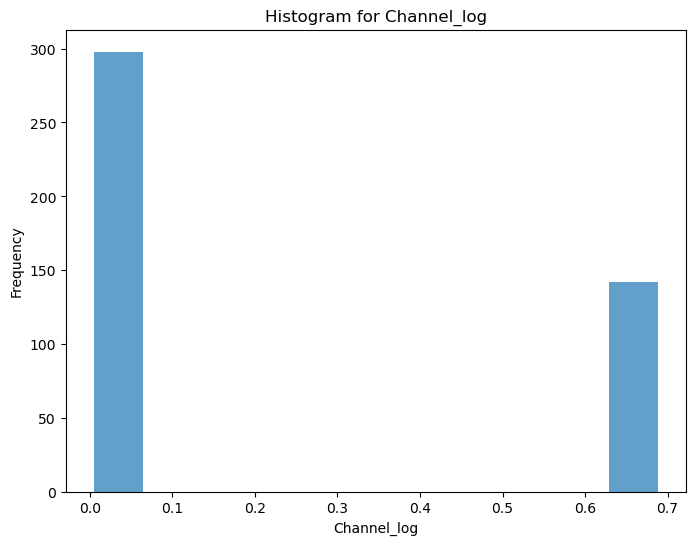

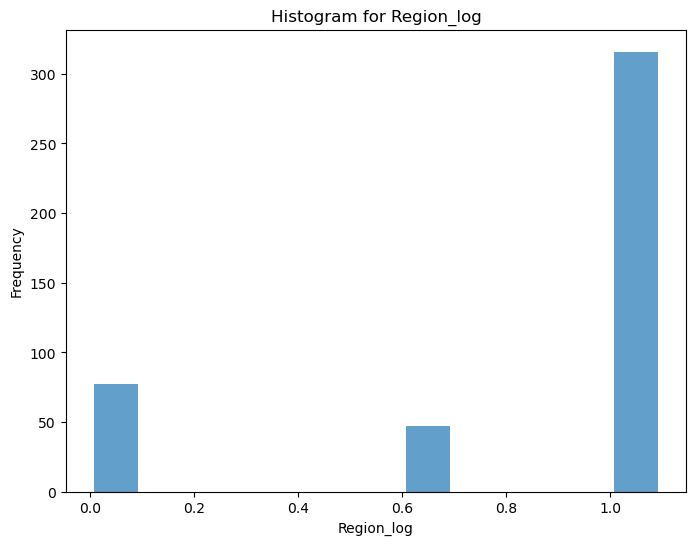

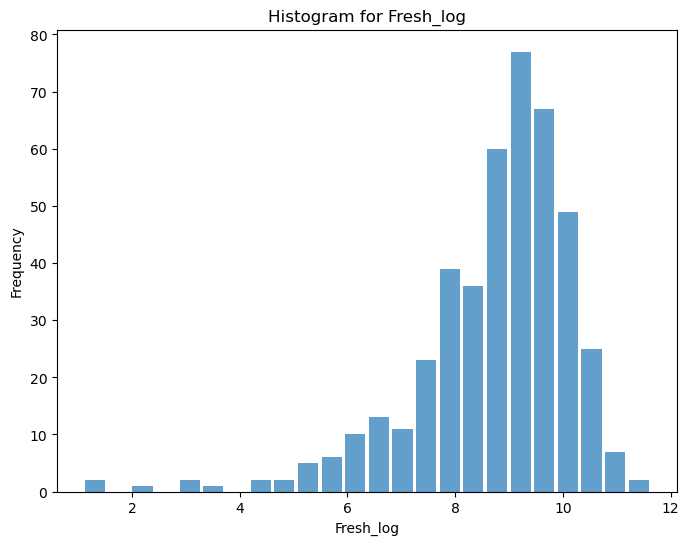

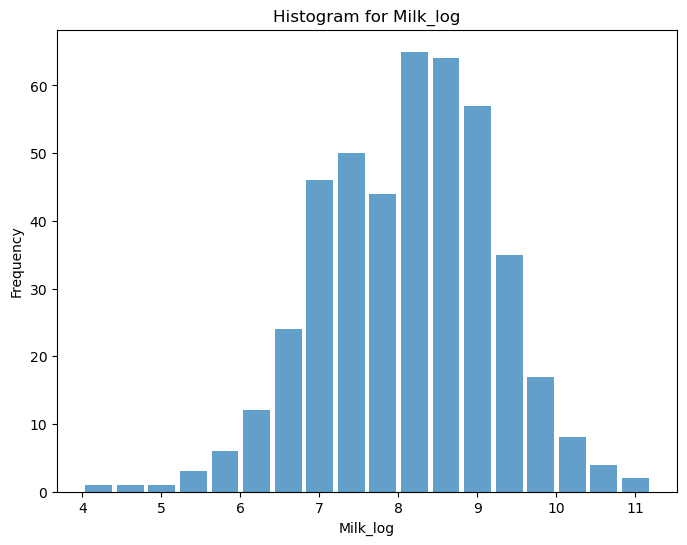

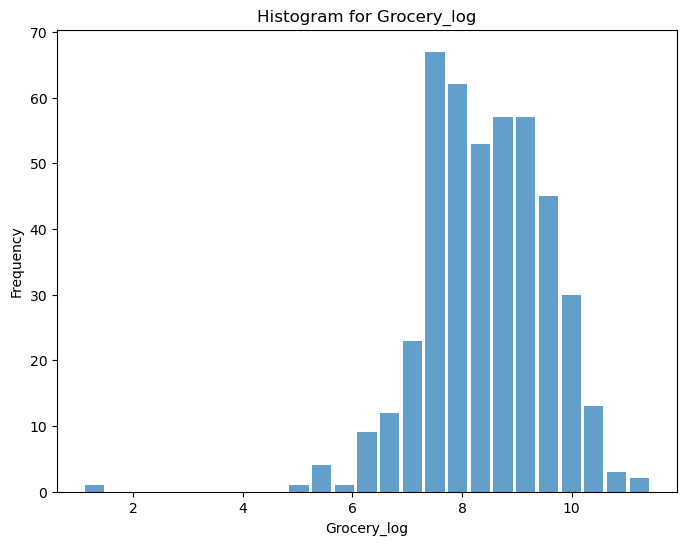

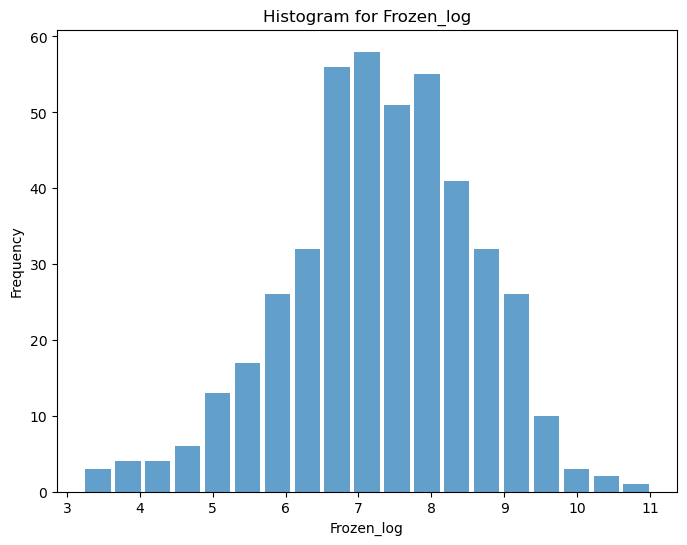

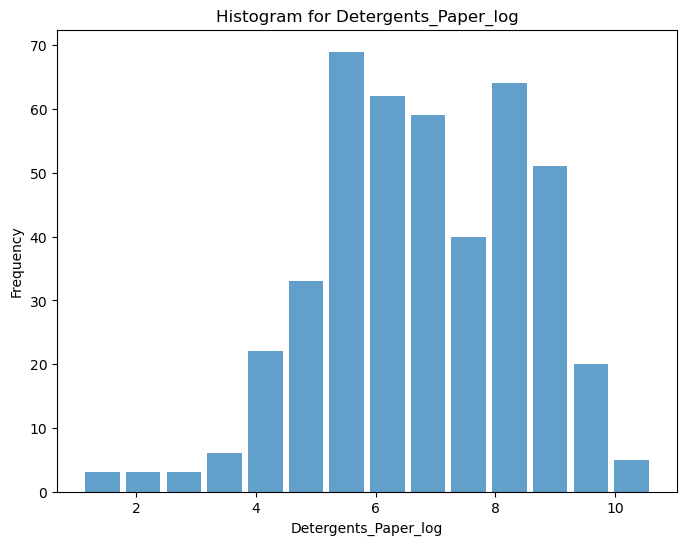

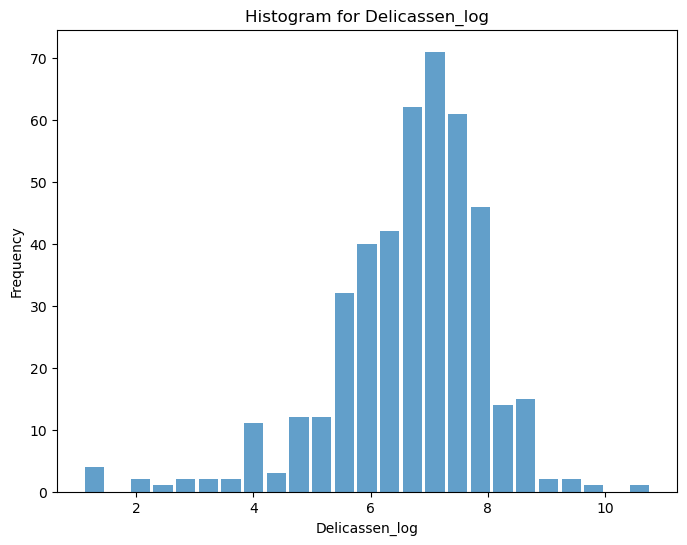

In [38]:
#Creating histograms for the all variables
def generate_histograms(data):
    for column in data.select_dtypes(include='number').columns:
        plt.figure(figsize=(8, 6))
        plt.hist(data[column], bins='auto', alpha=0.7, rwidth=0.85)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram for {column}')
        plt.show()

generate_histograms(data)

In [37]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

log_transform(data, data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Channel               440 non-null    int64  
 1   Region                440 non-null    int64  
 2   Fresh                 440 non-null    int64  
 3   Milk                  440 non-null    int64  
 4   Grocery               440 non-null    int64  
 5   Frozen                440 non-null    int64  
 6   Detergents_Paper      440 non-null    int64  
 7   Delicassen            440 non-null    int64  
 8   Channel_log           440 non-null    float64
 9   Region_log            440 non-null    float64
 10  Fresh_log             440 non-null    float64
 11  Milk_log              440 non-null    float64
 12  Grocery_log           440 non-null    float64
 13  Frozen_log            440 non-null    float64
 14  Detergents_Paper_log  440 non-null    float64
 15  Delicassen_log        4

/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

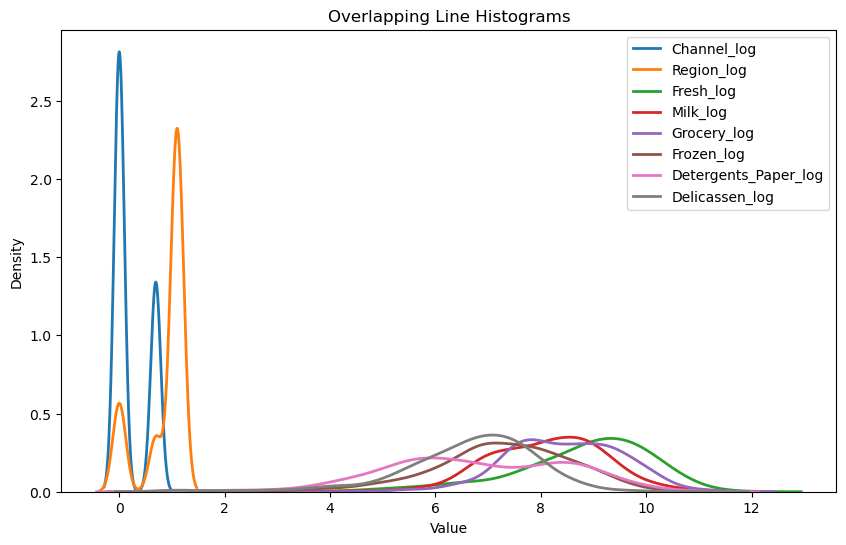

In [43]:
def generate_overlapping_line_histograms(dataframe):
    plt.figure(figsize=(10, 6))

    selected_columns = dataframe.filter(regex='_log$', axis=1)

    for column in selected_columns.columns:
        sns.kdeplot(dataframe[column], fill=False, label=column, linewidth=2)

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Overlapping Line Histograms')
    plt.legend()
    plt.show()

# Assuming data is your DataFrame
generate_overlapping_line_histograms(data)

In [46]:
selected_columns = data.filter(regex='_log$', axis=1)

data_log = data[selected_columns.columns]
data_log.head()

,Channel_log,Region_log,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [64]:
data_log.corr()

,Channel_log,Region_log,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
Channel_log,1.000000,0.069739,-0.168050,0.577156,0.660635,-0.244961,0.724456,0.130466
Region_log,0.069739,1.000000,0.008975,0.030757,0.010162,-0.083354,0.018186,-0.012798
Fresh_log,-0.168050,0.008975,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk_log,0.577156,0.030757,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery_log,0.660635,0.010162,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen_log,-0.244961,-0.083354,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper_log,0.724456,0.018186,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicassen_log,0.130466,-0.012798,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


<Axes: >

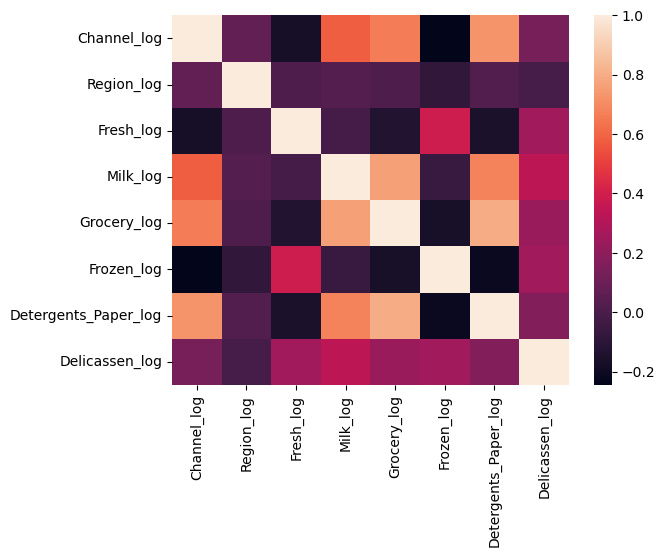

In [65]:
sns.heatmap(data_log.corr())

In [66]:
data = data.drop(columns=selected_columns.columns)

KeyError: "['Channel_log', 'Region_log', 'Fresh_log', 'Milk_log', 'Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log'] not found in axis"

In [53]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

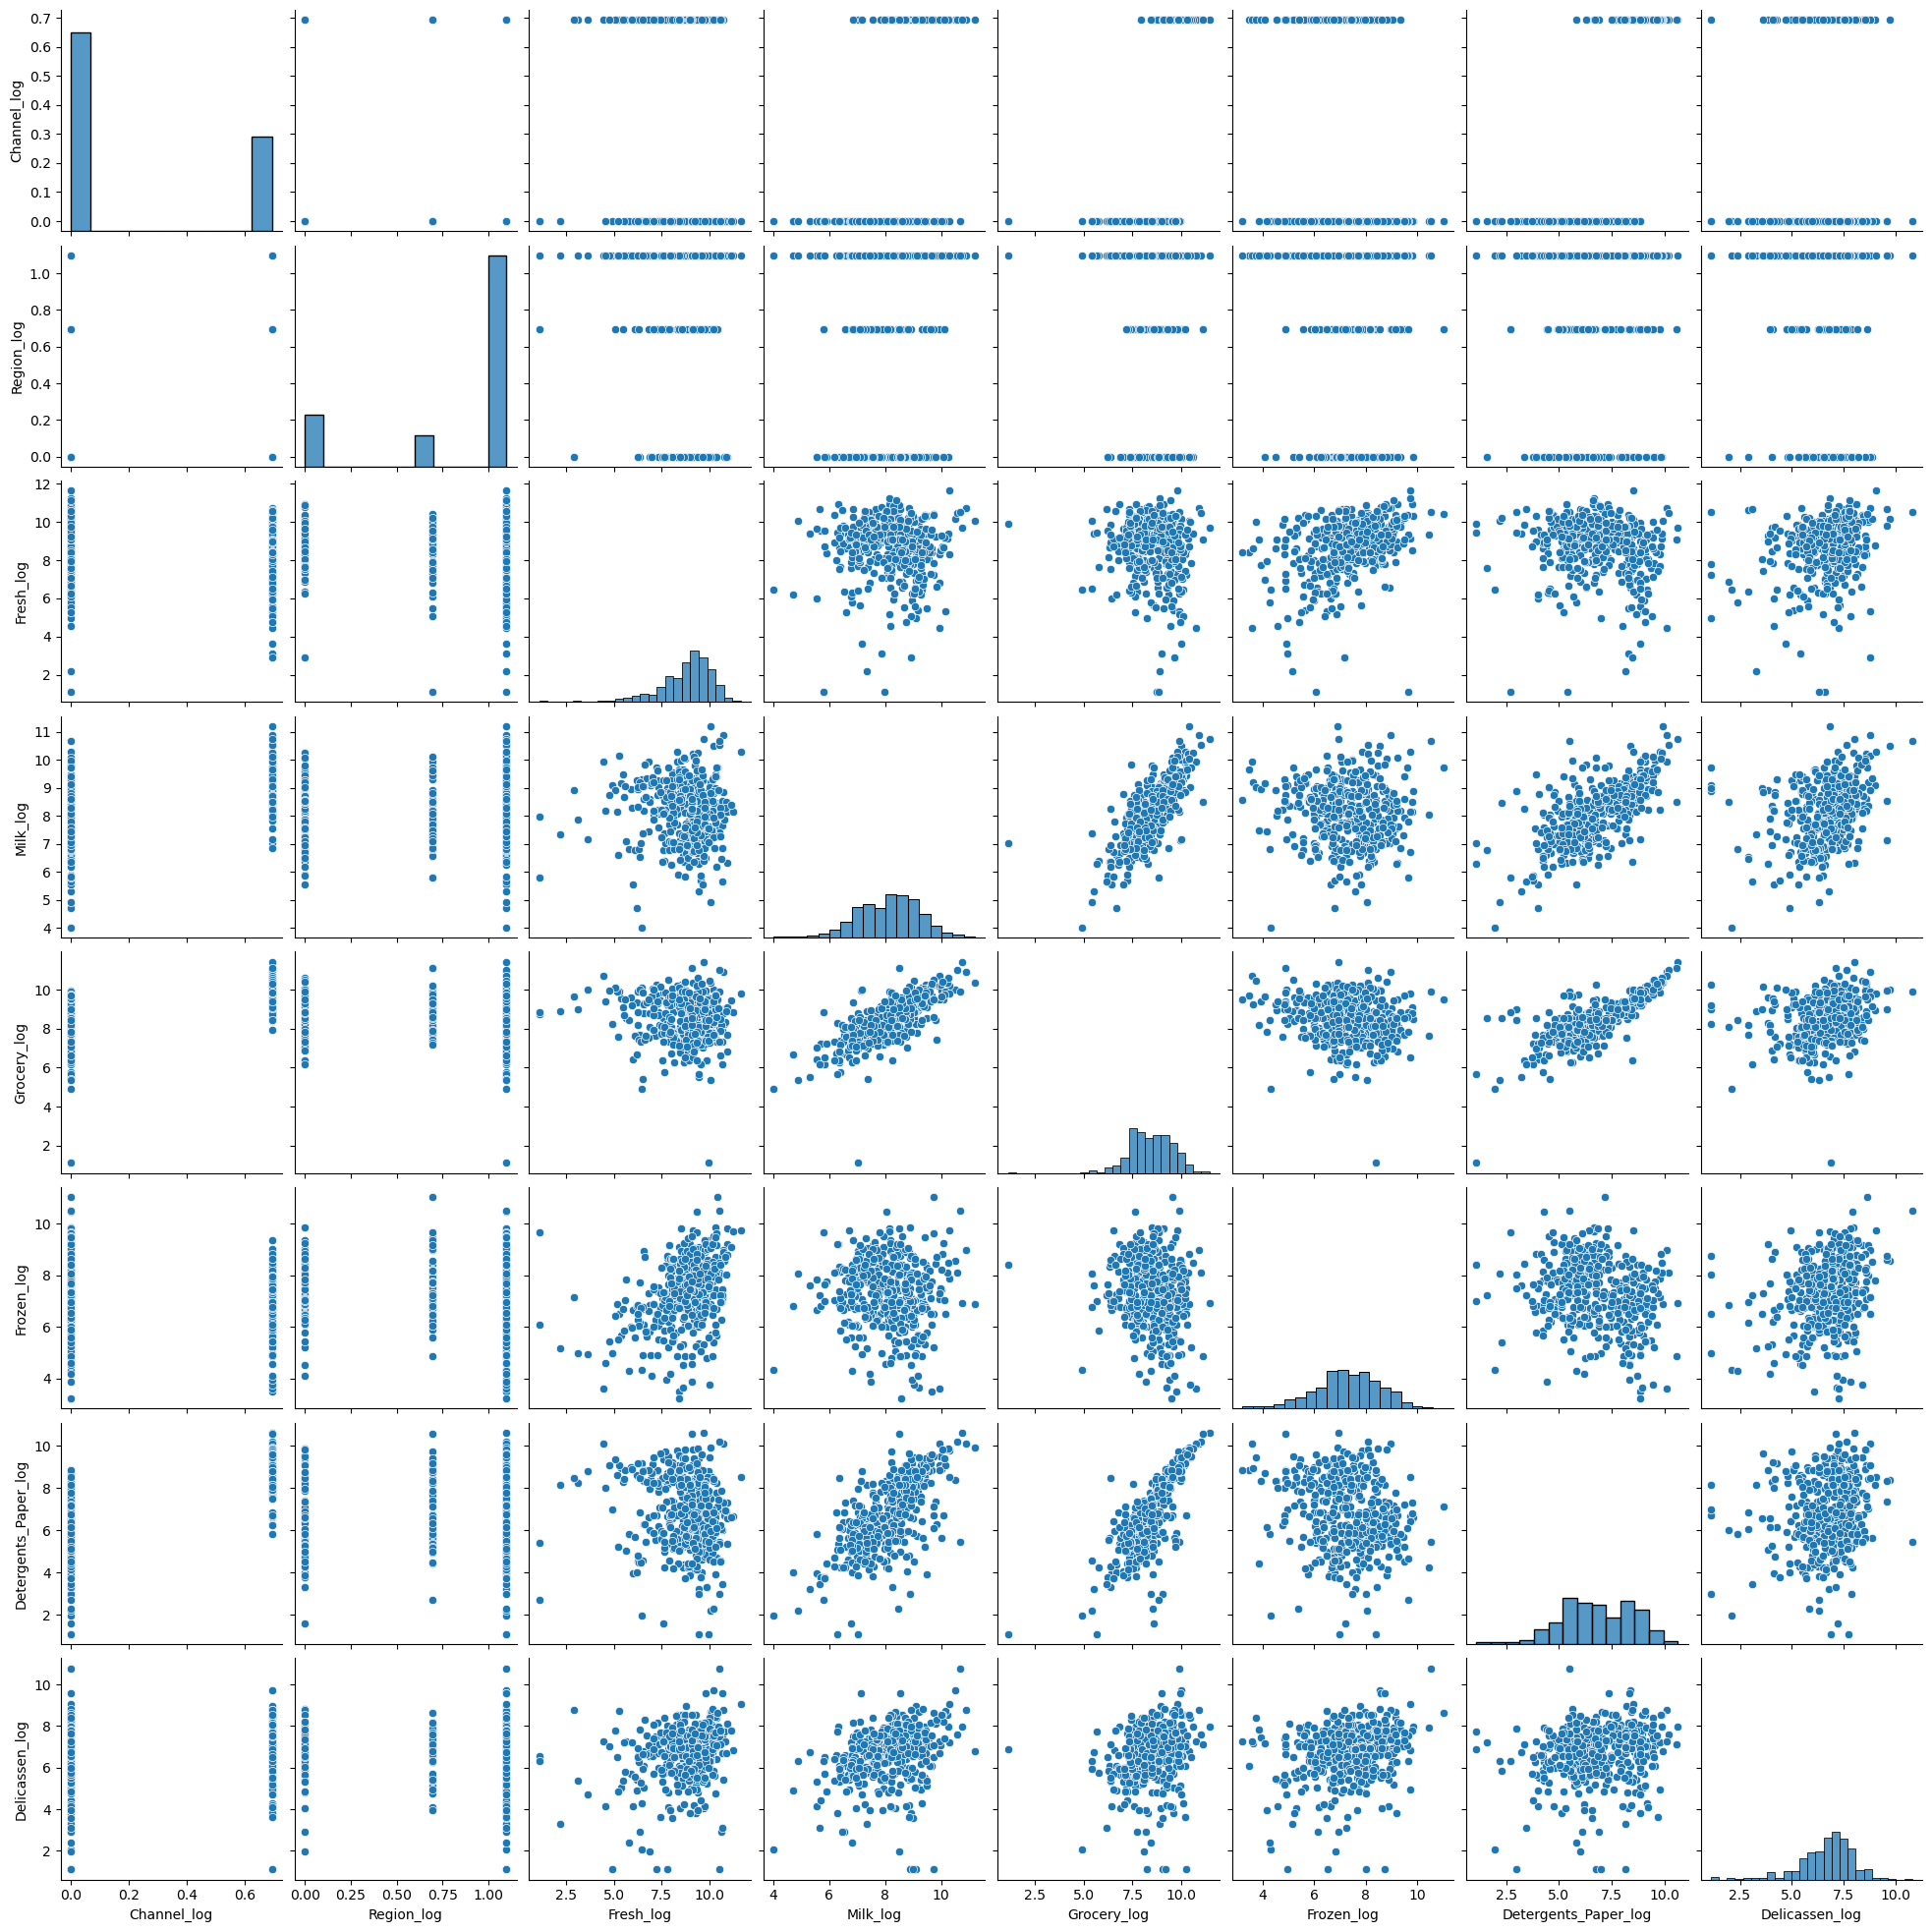

In [57]:
#Checking correlational relationships
sns.pairplot(data_log)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [59]:
#Determing the elbow point
from sklearn.cluster import KMeans

X = data_log
distortions = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

/anaconda3/envs/testmojave/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


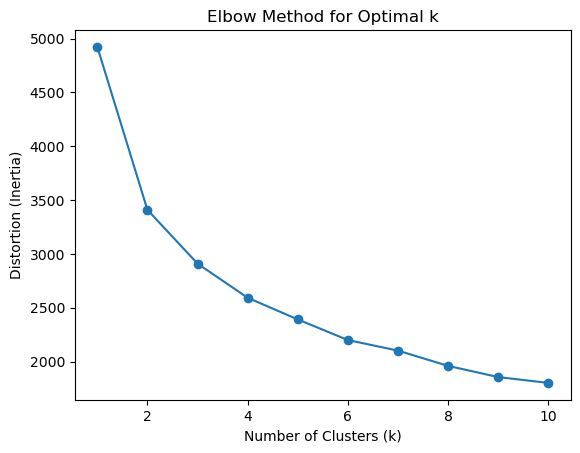

In [60]:
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.show()

In [102]:
from sklearn.datasets import make_blobs

#Splitting the data into clusters
X, y = make_blobs(n_samples=150,
                  n_features=8,
                  centers=2,
                  cluster_std=0.5,
                  random_state=0)

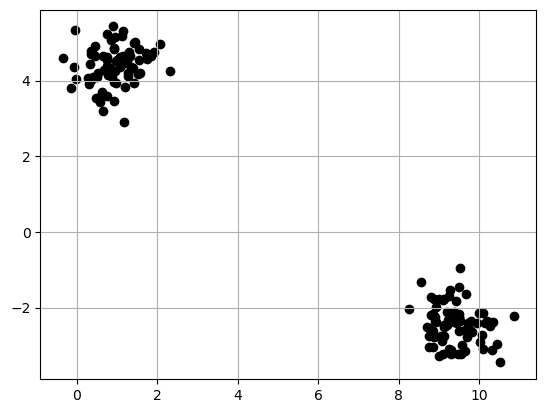

In [103]:
#Visualize the data
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

In [104]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
ykm = kmeans.fit_predict(X)

In [105]:
from sklearn.metrics import silhouette_score

#Using silhouette score to quantify my clusters
silhouette_avg = silhouette_score(X, ykm)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9151150419540627


In [106]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

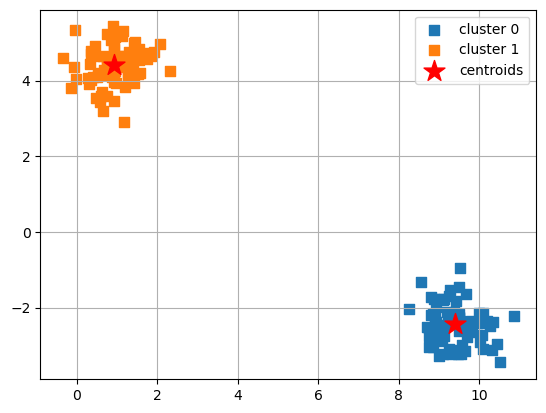

In [108]:
# plot clustering result
plot_clusters(X, ykm, plt_cluster_centers= True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [109]:
#Splitting the data into clusters
X, y = make_blobs(n_samples=150,
                  n_features=8,
                  centers=2,
                  cluster_std=0.5,
                  random_state=0)

In [110]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [114]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(linkage='ward',
                             n_clusters = 2)

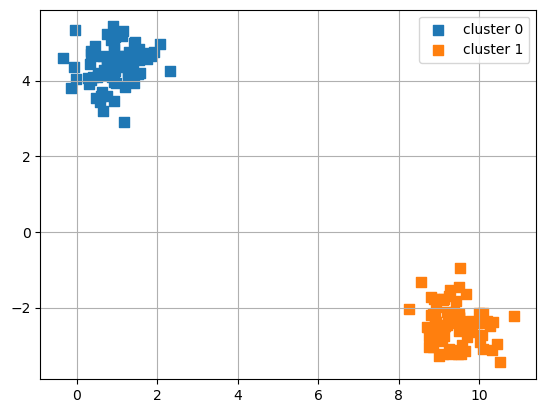

In [115]:
yhc = ac.fit_predict(X)
plot_clusters(X,yhc)

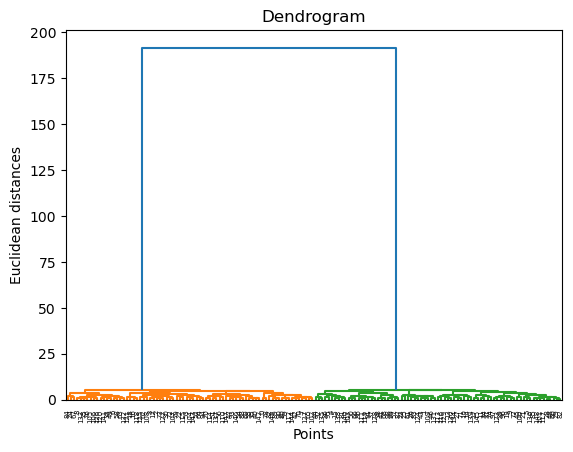

In [117]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

plot_dendrogram(X)

In [142]:
data_log

,Channel_log,Region_log,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...,...,...
435,0.000000,1.098612,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,0.000000,1.098612,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,0.693147,1.098612,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,0.000000,1.098612,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_p = data_log.drop(columns=['Region_log', 'Channel_log'])
X_scaled = scaler.fit_transform(X_p)

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit(X_p)

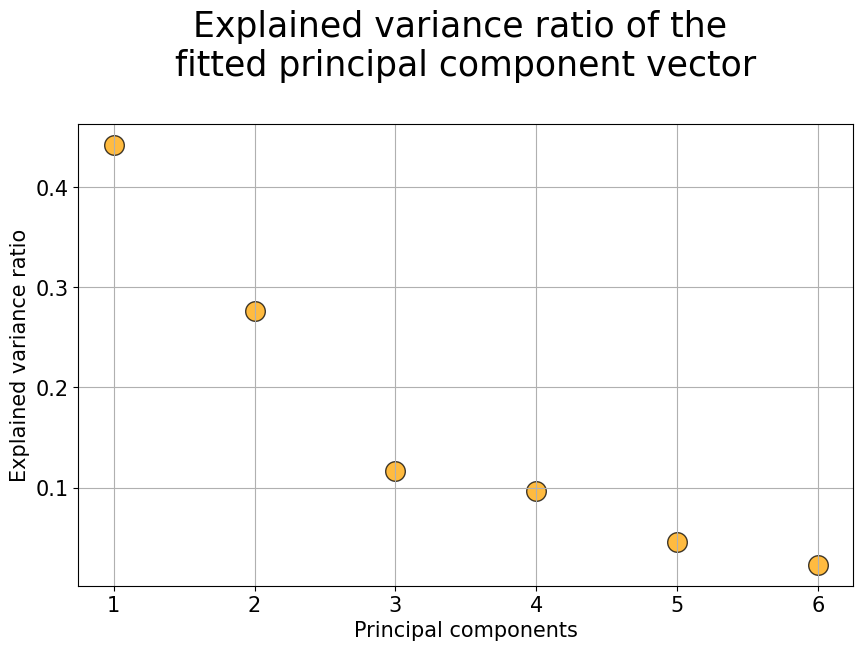

In [153]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_pca.explained_variance_ratio_))],
            y=X_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [162]:
- By conducting PCA, we can determine that PC1 and PC2 make up approximately 70% of the variance with respect to the data.
- Data was very skewed to the right as shown in the histograms which was standardised for the model.
- The highest correlation was between the Grocery and Detergent Papers
- Using the elbow test, we determined that only 2 clustering centers were needed for the unsupervised model

SyntaxError: invalid syntax (4153834471.py, line 1)